 **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Importing & Loading the Dataset**

In [ ]:
df = pd.read_csv('/content/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Dataset Information:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

**Data Cleaning**

Checking the missing values

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


**Filling the missing values by "mean" and "median"**

In [ ]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [ ]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


**Drop the remaining missing values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df.shape

(542, 13)

# Exploratory Data Analysis

Comparison between Parameters in getting the Loan:

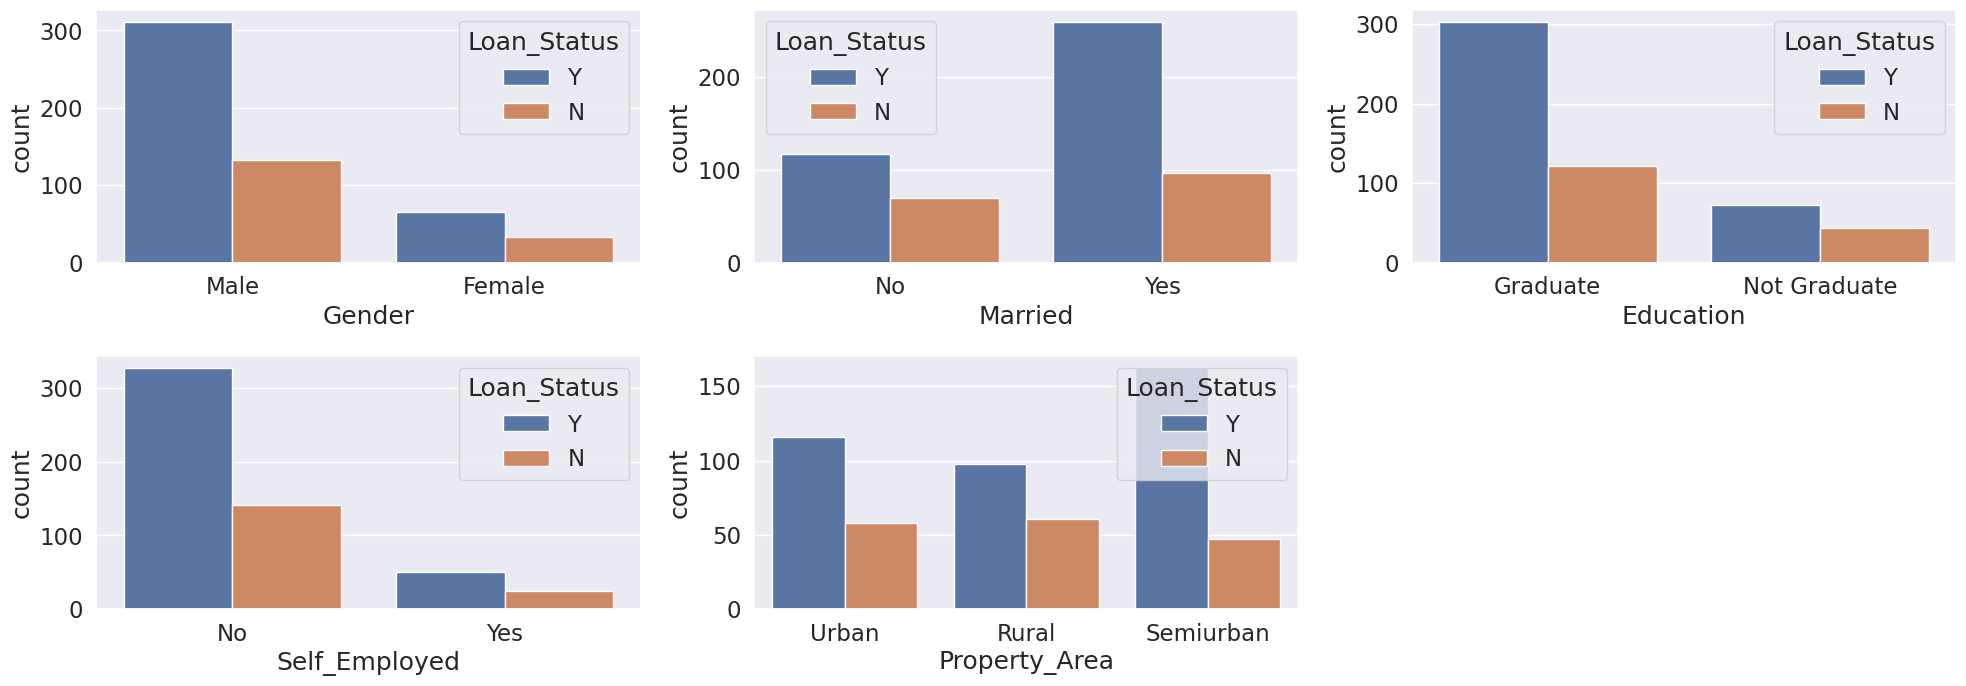

In [ ]:
plt.figure(figsize=(20, 10))  # Adjust the figure size to something more manageable
sns.set(font_scale=1.5)  # Adjust font scaling as needed

plt.subplot(331)
sns.countplot(x='Gender', hue='Loan_Status', data=df)

plt.subplot(332)
sns.countplot(x='Married', hue='Loan_Status', data=df)

plt.subplot(333)
sns.countplot(x='Education', hue='Loan_Status', data=df)

plt.subplot(334)
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

plt.subplot(335)
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

plt.tight_layout()  # Optional, helps with spacing between plots
plt.show()  # Ensure the plots are displayed


**Let's replace the Variable values to Numerical form & display the Value Counts**




The data in Numerical form avoids disturbances in building the model.

In [ ]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
1,376
0,166


In [ ]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

,count
Gender,
1,444
0,98


In [ ]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

,count
Married,
1,355
0,187


In [ ]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

,count
Dependents,
0,309
1,94
2,94
3,45


In [ ]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

,count
Education,
1,425
0,117


In [ ]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

,count
Self_Employed,
0,467
1,75


In [ ]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

,count
Property_Area,
1,209
2,174
0,159


In [ ]:
df['LoanAmount'].value_counts()

,count
LoanAmount,
146.412162,19
120.000000,15
100.000000,14
110.000000,13
187.000000,12
...,...
280.000000,1
240.000000,1
214.000000,1


In [ ]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,464
180.0,38
480.0,13
300.0,12
84.0,4
120.0,3
240.0,3
60.0,2
36.0,2


In [ ]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,468
0.0,74


From the above figure, we can see that **Credit_History** (Independent Variable) has the maximum correlation with **Loan_Status** (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

**Final DataFrame**

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


**Importing Packages for Classification algorithms**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**Splitting the dataset into Train and Test set**

# Logistic Regression

In [ ]:
X = df.iloc[1:542,1:12].values  ## (removed laon ID)Split data into features variable
y = df.iloc[1:542,12:13].values  #-- Split data into target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
df.iloc[1:542, 1:12].info()


<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             541 non-null    int64  
 1   Married            541 non-null    int64  
 2   Dependents         541 non-null    int64  
 3   Education          541 non-null    int64  
 4   Self_Employed      541 non-null    int64  
 5   ApplicantIncome    541 non-null    int64  
 6   CoapplicantIncome  541 non-null    float64
 7   LoanAmount         541 non-null    float64
 8   Loan_Amount_Term   541 non-null    float64
 9   Credit_History     541 non-null    float64
 10  Property_Area      541 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 50.7 KB


In [ ]:
df.iloc[1:542, 12:13].info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 1 to 613
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Loan_Status  541 non-null    int64
dtypes: int64(1)
memory usage: 8.5 KB


In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

lr_prediction = model_lr.predict(X_test)

In [ ]:
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_prediction))
print("Classification Report:\n", classification_report(y_test, lr_prediction))

Logistic Regression accuracy =  78.52760736196319
Confusion Matrix:
 [[ 24  33]
 [  2 104]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.42      0.58        57
           1       0.76      0.98      0.86       106

    accuracy                           0.79       163
   macro avg       0.84      0.70      0.72       163
weighted avg       0.82      0.79      0.76       163



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create and train the Random Forest model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = model_rf.predict(X_test)

In [ ]:
# Evaluate the model
print('Random Forest accuracy = ', metrics.accuracy_score(y_pred_rf,y_test)*100)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest accuracy =  77.30061349693251
Confusion Matrix:
 [[ 26  31]
 [  6 100]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.46      0.58        57
           1       0.76      0.94      0.84       106

    accuracy                           0.77       163
   macro avg       0.79      0.70      0.71       163
weighted avg       0.78      0.77      0.75       163



# **Testing Real World Loan Dataset**




In [ ]:
test_dataset = pd.read_csv('/content/loan_testset.csv')

In [ ]:
test_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0,146.412162,360,1,2
1,0,1,2,1,0,1378,1881,167.000000,360,1,2
2,1,0,0,1,0,2366,2531,136.000000,360,1,1
3,1,0,0,1,1,2237,0,63.000000,480,0,1
4,1,0,0,0,0,4885,0,48.000000,360,1,0


In [ ]:
predicted_data_lr = model_lr.predict(test_dataset)
predicted_data_lr

array([1, 1, 1, 0, 1, 1])

In [ ]:
predicted_data_rf = model_rf.predict(test_dataset)
predicted_data_rf

array([1, 1, 1, 0, 0, 0])

In [ ]:

print("\nLogistic Regression Model")
for i in range(len(predicted_data_lr)):
  if predicted_data_lr[i]==0:
    loan = "Loan Rejected"
  else:
    loan = "Loan Approved"
  print(f"Customer {i+1}: {loan}")


print("\nRandom Forest Model")
for k in range(len(predicted_data_rf)):
  if predicted_data_rf[k]==0:
    loan = "Loan Rejected"
  else:
    loan = "Loan Approved"
  print(f"Customer {k+1}: {loan}")


Logistic Regression Model
Customer 1: Loan Approved
Customer 2: Loan Approved
Customer 3: Loan Approved
Customer 4: Loan Rejected
Customer 5: Loan Approved
Customer 6: Loan Approved

Random Forest Model
Customer 1: Loan Approved
Customer 2: Loan Approved
Customer 3: Loan Approved
Customer 4: Loan Rejected
Customer 5: Loan Rejected
Customer 6: Loan Rejected


**CONCLUSION:**

1. The Loan Status is heavily dependent on the Credit History for Predictions
2. The Logistic Regression algorithm gives us the maximum Accuracy (79% approx)
